In [ ]:
# Install selenium library and save into the path
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 958 kB 22.6 MB/s 
     |████████████████████████████████| 138 kB 49.4 MB/s 
     |████████████████████████████████| 356 kB 43.5 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 3.6 MB 59.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin

# Import Libraries

In [ ]:
# import libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# create object for chrome options
chrome_options = Options()
# set chrome driver options to disable any popup's from the website
# to find local path for chrome profile, open chrome browser
# and in the address bar type, "chrome://version"
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('--disable-infobars')
chrome_options.add_argument('start-maximized')
# chrome_options.add_argument('user-data-dir=C:\\Users\\username\\AppData\\Local\\Google\\Chrome\\User Data\\Default')
# To disable the message, "Chrome is being controlled by automated test software"
chrome_options.add_argument("disable-infobars")
# Pass the argument 1 to allow and 2 to block
chrome_options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 2
    })

# Functions

In [ ]:
#  Return the driver on the given url
def request(wd, url):
  wd.get(url)
  wd.implicitly_wait(100)
  return wd

# Data Transformation

# format the values (eg  1.2k to 1200)
def formatNumber(el):
  if('k' in el and '.' in el):
    idxOfPeriod = el.index('.')
    return (el[:idxOfPeriod] + el[idxOfPeriod+1] + '00')
  elif('k' in el):
    return (el[:len(el)-1] + '000')
  else:
    return el

def extractValue(el):
  return re.sub(r'[\()]','',[item for item in el.split(' ')][-1]).strip()

# format the price tag by removing the 'RM'
def formatPrice(el):
  price = re.sub(r'[RM]', '', el).strip()
  return price

def averagePrice(el):
  if('-' in el):
    return sum([float(p) for p in el.split('-')])/2
  else:
    return float(el)

# Scrape Data

In [ ]:
# Scrape the bag items' URL
bagURL = 'https://shopee.com.my/mall/Women\'s-Bags-cat.11000710/popular?pageNumber=1'
containerURLs = []

for i in range(4):
  driver = request(webdriver.Chrome('chromedriver',options=chrome_options), (bagURL[:len(bagURL)-1]+str(i+1)))
  containerAnchor = driver.find_element_by_xpath('/html/body/div[1]/div/div[2]/div[2]/div[2]/div[1]/div').find_elements_by_tag_name('a')
  containerURLs.append([el.get_attribute('href') for el in containerAnchor])

# Quit the driver
driver.quit()
# Flatten the container to 1D shape
flattenContainerURLs = [row for el in containerURLs for row in el]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* co

In [ ]:
flattenContainerURLs

['https://shopee.com.my/POLO-HILL-Opal-Crossbody-Bag-PHS1-0B-210-i.29993877.5358789363',
 'https://shopee.com.my/POLO-HILL-Ensign-Sling-Bag-PHD1-0B-107-i.29993877.3149660115',
 'https://shopee.com.my/Tomorrow-Showtime-Sling-Bag-SL798-i.267627342.7784985989',
 'https://shopee.com.my/Carlo-Rino-Black-Dazzling-Diana-Shoulder-Bag-i.126606645.15201545296',
 'https://shopee.com.my/Polo-Women-Sling-Bag-Navy-PHUA-26004-(Beg-Tangan-Wanita-Polo)-i.289712455.10344433035',
 'https://shopee.com.my/POLO-HILL-Ladies-Furrow-Shoulder-Bag-PHD1-0B-225-i.29993877.3170003898',
 'https://shopee.com.my/adidas-ORIGINALS-Marimekko-Waist-Bag-Women-Pink-H09153-i.283343095.13315288351',
 'https://shopee.com.my/Polo-Women-Sling-Bag-Pink-PHUA-26004-(Beg-Tangan-Wanita-Polo)-i.289712455.12202272335',
 "https://shopee.com.my/JASMIN-NOIR-PU-Leather-Women's-Sling-Bag-Fashion-Simple-Messenger-Bag-Small-Hobos-Shoulder-Bag-For-Ladies-i.237821223.10212215190",
 "https://shopee.com.my/RCB-Polo-Club-Women's-PU-Sling-Bag-Taupe

In [ ]:
# Make few empty list to store the elements
shopNumberOfFollowers, shopNumberOfRatings, productName, productPrice, productNumberOfQuantitySold, productStarRating, productNumberOfRatings, productNumberOfFavourites = [],[],[],[],[],[],[],[]

# initialize the starting page
i = 0

for url in flattenContainerURLs:
  driver = request(webdriver.Chrome('chromedriver',options=chrome_options), url)
  delay = 5 
  while True:
    try:
        WebDriverWait(driver, delay)
        sleep(5)
        html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML") #

        # append the price of the product to the list
        productPrice.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div.flex.flex-auto._3qq4y7 > div > div:nth-child(3) > div > div > div > div > div.flex.items-center > div._2v0Hgx').get_attribute('innerText'))

        # append the number of quantity sold of the product to the list
        productNumberOfQuantitySold.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div.flex.flex-auto._3qq4y7 > div > div.flex._28iFbX > div.flex.voPlNU > div._3b2Btx').get_attribute('innerText'))

        # append the follower of the shop to the list
        shopNumberOfFollowers.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.S_agbT > div.X-Jp7y.page-product__shop > div._3n5HPy > div:nth-child(3) > div:nth-child(2) > span').get_attribute('innerText'))
          
        # append the number of ratings of the shop to the list
        shopNumberOfRatings.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.S_agbT > div.X-Jp7y.page-product__shop > div._3n5HPy > div:nth-child(1) > div > span').get_attribute('innerText'))

        # append the name of the product to the list
        productName.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div.flex.flex-auto._3qq4y7 > div > div._3g8My- > span').get_attribute('innerText'))

        # append the star ratings of the product to the list
        productStarRating.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div.flex.flex-auto._3qq4y7 > div > div.flex._28iFbX > div:nth-child(1) > div._3uBhVI.URjL1D').get_attribute('innerText'))

        # append the number of ratings of the product to the list
        productNumberOfRatings.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div.flex.flex-auto._3qq4y7 > div > div.flex._28iFbX > div:nth-child(2) > div._3uBhVI').get_attribute('innerText'))

        # append the number of favourite of the product to the list
        productNumberOfFavourites.append(driver.find_element(By.CSS_SELECTOR,'#main > div > div:nth-child(3) > div._3A8xof > div > div.page-product.page-product--mall > div > div.product-briefing.flex.card._1j7uGn > div._11Y_VZ > div.flex.justify-center.items-center > div.flex.items-center._3oXgUo > div').get_attribute('innerText'))

        # close the driver
        driver.close()
        i+=1
        print(i)
        break

    except TimeoutException:
        print ("Loading took too much time!-Try again") 

# Quit the driver
driver.quit()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


# Build Dataframe

In [ ]:
df_bag = pd.DataFrame({'Product- Name':productName, 'Product- Price (RM)':productPrice, 'Product- Number of Quantity Sold':productNumberOfQuantitySold, 'Product- Star Rating':productStarRating, 
                       'Product- Number of Ratings':productNumberOfRatings, 'Shop- Number of Ratings':shopNumberOfRatings, 'Product- Number of Favourites':productNumberOfFavourites, 
                       'Shop- Number of Followers':shopNumberOfFollowers, 'URL':flattenContainerURLs})

In [ ]:
df_bag

,Product- Name,Product- Price (RM),Product- Number of Quantity Sold,Product- Star Rating,Product- Number of Ratings,Shop- Number of Ratings,Product- Number of Favourites,Shop- Number of Followers,URL
0,POLO HILL Opal Crossbody Bag PHS1-0B-210,RM89.00,1500,5.0,1100,110.6k,Favorite (2.4k),299.7k,https://shopee.com.my/POLO-HILL-Opal-Crossbody...
1,POLO HILL Ensign Sling Bag PHD1-0B-107,RM107.97,3400,5.0,2400,110.6k,Favorite (4.9k),299.7k,https://shopee.com.my/POLO-HILL-Ensign-Sling-B...
2,Tomorrow Showtime Sling Bag SL798,RM59.90,469,4.9,277,22k,Favorite (140),100.6k,https://shopee.com.my/Tomorrow-Showtime-Sling-...
3,Carlo Rino Black Dazzling Diana Shoulder Bag,RM219.50,59,4.9,35,117.2k,Favorite (355),205.1k,https://shopee.com.my/Carlo-Rino-Black-Dazzlin...
4,Polo Women Sling Bag - Navy PHUA-26004 (Beg Ta...,RM48.00,207,5.0,146,5.8k,Favorite (158),53k,https://shopee.com.my/Polo-Women-Sling-Bag-Nav...
...,...,...,...,...,...,...,...,...,...
178,Bostanten Women Long Purses Fashion Woven Patt...,RM19.90,902,4.9,567,12.4k,Favorite (398),16.8k,https://shopee.com.my/Bostanten-Women-Long-Pur...
179,Playboy Bunny Ladies Card Holder BP 95 Multi C...,RM29.95,201,5.0,113,23.1k,Favorite (121),109.2k,https://shopee.com.my/Playboy-Bunny-Ladies-Car...
180,Bostanten Wallet Woman Long Purse for Women Mu...,RM25.99,874,4.9,552,12.4k,Favorite (439),16.8k,https://shopee.com.my/Bostanten-Wallet-Woman-L...
181,Bostanten Wallet Woman Leather Muti-Funtional ...,RM29.00,4100,4.9,2600,12.4k,Favorite (1.8k),16.8k,https://shopee.com.my/Bostanten-Wallet-Woman-L...


# Data Transformation

***Shop- Number of Ratings***

In [ ]:
# Before 
df_bag[['Shop- Number of Ratings']]

,Shop- Number of Ratings
0,110.6k
1,110.6k
2,22k
3,117.2k
4,5.8k
...,...
178,12.4k
179,23.1k
180,12.4k
181,12.4k


In [ ]:
# After

# format the number to its base form
df_bag['Shop- Number of Ratings'] = df_bag['Shop- Number of Ratings'].apply(formatNumber)

# convert to integer
df_bag['Shop- Number of Ratings'] = df_bag['Shop- Number of Ratings'].apply(lambda x : int(x) if x.isdigit() else x)

In [ ]:
df_bag[['Shop- Number of Ratings']]

,Shop- Number of Ratings
0,110600
1,110600
2,22000
3,117200
4,5800
...,...
178,12400
179,23100
180,12400
181,12400


***Shop- Number of Followers***

In [ ]:
# Before
df_bag[['Shop- Number of Followers']]

,Shop- Number of Followers
0,299.7k
1,299.7k
2,100.6k
3,205.1k
4,53k
...,...
178,16.8k
179,109.2k
180,16.8k
181,16.8k


In [ ]:
# After

# format the number to its base form
df_bag['Shop- Number of Followers'] = df_bag['Shop- Number of Followers'].apply(formatNumber)

# convert to integer
df_bag['Shop- Number of Followers'] = df_bag['Shop- Number of Followers'].astype(int)

In [ ]:
df_bag[['Shop- Number of Followers']]

,Shop- Number of Followers
0,299700
1,299700
2,100600
3,205100
4,53000
...,...
178,16800
179,109200
180,16800
181,16800


***Product- Number of Favourites***

In [ ]:
# Before
df_bag[['Product- Number of Favourites']]

,Product- Number of Favourites
0,Favorite (2.4k)
1,Favorite (4.9k)
2,Favorite (140)
3,Favorite (355)
4,Favorite (158)
...,...
178,Favorite (398)
179,Favorite (121)
180,Favorite (439)
181,Favorite (1.8k)


In [ ]:
# After

# to extract out the number from the string 
df_bag['Product- Number of Favourites'] = df_bag['Product- Number of Favourites'].apply(extractValue)
# format the number to its base form
df_bag['Product- Number of Favourites'] = df_bag['Product- Number of Favourites'].apply(formatNumber)
# convert to integer
df_bag['Product- Number of Favourites'] = df_bag['Product- Number of Favourites'].astype(int)

In [ ]:
df_bag[['Product- Number of Favourites']]

,Product- Number of Favourites
0,2400
1,4900
2,140
3,355
4,158
...,...
178,398
179,121
180,439
181,1800


***Product- Price (RM)***

In [ ]:
# Before
df_bag[['Product- Price (RM)']]

,Product- Price (RM)
0,RM89.00
1,RM107.97
2,RM59.90
3,RM219.50
4,RM48.00
...,...
178,RM19.90
179,RM29.95
180,RM25.99
181,RM29.00


In [ ]:
# After

# remove the 'RM' from the price tag
df_bag['Product- Price (RM)'] = df_bag['Product- Price (RM)'].apply(formatPrice)
# calculate the average of the price range
df_bag['Product- Price (RM)'] = df_bag['Product- Price (RM)'].apply(averagePrice)

In [ ]:
df_bag[['Product- Price (RM)']]

,Product- Price (RM)
0,89.00
1,107.97
2,59.90
3,219.50
4,48.00
...,...
178,19.90
179,29.95
180,25.99
181,29.00


***Product- Star Rating***

In [ ]:
# Before
df_bag[['Product- Star Rating']]

,Product- Star Rating
0,5.0
1,5.0
2,4.9
3,4.9
4,5.0
...,...
178,4.9
179,5.0
180,4.9
181,4.9


In [ ]:
# After
df_bag['Product- Level of Satisfaction'] = pd.cut(x=df_bag['Product- Star Rating'], bins=[0,1,2,3,4,5], labels=['Highly Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Highly Satisfied']) 

In [ ]:
df_bag[['Product- Star Rating', 'Product- Level of Satisfaction']]

,Product- Star Rating,Product- Level of Satisfaction
0,5.0,Highly Satisfied
1,5.0,Highly Satisfied
2,4.9,Highly Satisfied
3,4.9,Highly Satisfied
4,5.0,Highly Satisfied
...,...,...
178,4.9,Highly Satisfied
179,5.0,Highly Satisfied
180,4.9,Highly Satisfied
181,4.9,Highly Satisfied


# Data Cleaning

In [ ]:
# Function to remove outlier which is a data point that differs significantly from other observations
def outlierDetector(el):
  sortedSeries = el.sort_values()

  percentile25 = sortedSeries.quantile(0.25)
  percentile75 = sortedSeries.quantile(0.75)
  iqr = percentile75 - percentile25

  upper_limit = percentile75 + (1.5 * iqr)
  lower_limit = percentile25 - (1.5 * iqr)

  upperOutlierIdx = df_bag[el > upper_limit].index
  lowerOutlierIdx = df_bag[el < lower_limit].index

  return upperOutlierIdx, lowerOutlierIdx

***Shop- Number of Ratings***

In [ ]:
df_bag[['Shop- Number of Ratings']]

,Shop- Number of Ratings
0,110600
1,110600
2,22000
3,117200
4,5800
...,...
178,12400
179,23100
180,12400
181,12400


In [ ]:
# check the data type of the column
df_bag['Shop- Number of Ratings'].dtype

dtype('O')

In [ ]:
# check the unique value of the column
df_bag['Shop- Number of Ratings'].unique()

array([110600, 22000, 117200, 5800, 63300, 47300, 10400, 93800, 25300,
       16200, 77300, 40400, 52500, 37600, 150800, 8000, 52000, 63600,
       23100, 103600, 23700, 21500, 39000, 12400, 83700, 8700, 321900,
       4300, 255700, 39900, 207900, 10300, 396700, '1.5m', '4.2m', 308700,
       8400], dtype=object)

In [ ]:
# These row of data are abnormal compared to others because these data do not have the meaning
rowAbnormal = df_bag[(df_bag['Shop- Number of Ratings']=='1.5m') | (df_bag['Shop- Number of Ratings']=='4.2m')].index
df_bag.drop(rowAbnormal, axis=0, inplace=True)

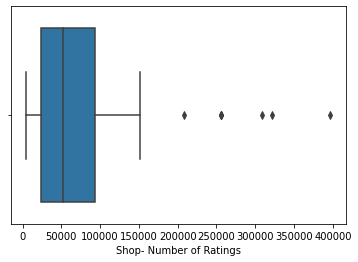

In [ ]:
# Before
sb.boxplot(x=df_bag['Shop- Number of Ratings'])
plt.show()

In [ ]:
upperOutlierIdx , lowerOutlierIdx = outlierDetector(df_bag['Shop- Number of Ratings'])

if(len(upperOutlierIdx) > 0):
  df_bag.drop(upperOutlierIdx, axis=0, inplace=True)

if(len(lowerOutlierIdx)> 0):
    df_bag.drop(lowerOutlierIdx, axis=0, inplace=True)

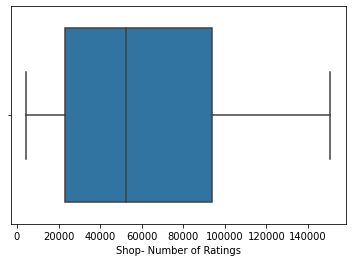

In [ ]:
# After
sb.boxplot(x=df_bag['Shop- Number of Ratings'], showfliers = False)
plt.show()

***Product- Price (RM)***

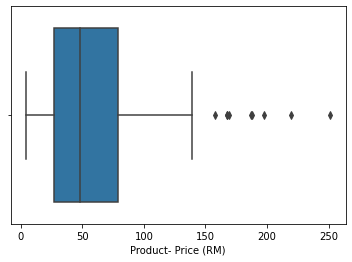

In [ ]:
# Before
sb.boxplot(x=df_bag['Product- Price (RM)'])
plt.show()

In [ ]:
upperOutlierIdx , lowerOutlierIdx = outlierDetector(df_bag['Product- Price (RM)'])

if(len(upperOutlierIdx) > 0):
  df_bag.drop(upperOutlierIdx, axis=0, inplace=True)

if(len(lowerOutlierIdx)> 0):
    df_bag.drop(lowerOutlierIdx, axis=0, inplace=True)

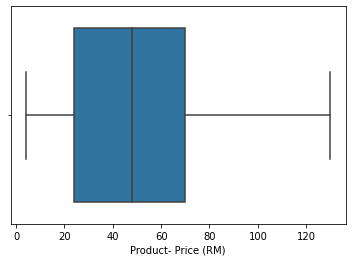

In [ ]:
# After
sb.boxplot(x=df_bag['Product- Price (RM)'], showfliers = False)
plt.show()

***Product- Number of Quantity Sold***

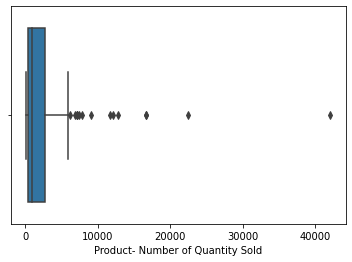

In [ ]:
# Before
sb.boxplot(x=df_bag['Product- Number of Quantity Sold'])
plt.show()

In [ ]:
upperOutlierIdx , lowerOutlierIdx = outlierDetector(df_bag['Product- Number of Quantity Sold'])

if(len(upperOutlierIdx) > 0):
  df_bag.drop(upperOutlierIdx, axis=0, inplace=True)

if(len(lowerOutlierIdx)> 0):
    df_bag.drop(lowerOutlierIdx, axis=0, inplace=True)

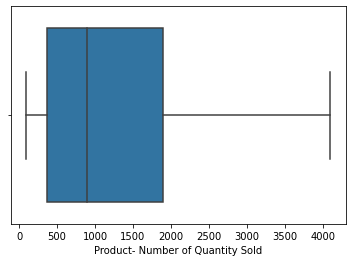

In [ ]:
# After
sb.boxplot(x=df_bag['Product- Number of Quantity Sold'], showfliers = False)
plt.show()

***Product- Number of Ratings***

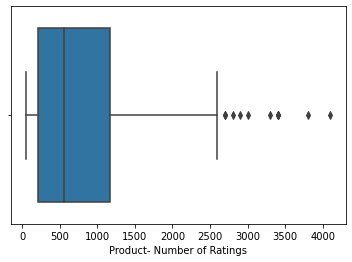

In [ ]:
# Before
sb.boxplot(x=df_bag['Product- Number of Ratings'])
plt.show()

In [ ]:
upperOutlierIdx , lowerOutlierIdx = outlierDetector(df_bag['Product- Number of Ratings'])

if(len(upperOutlierIdx) > 0):
  df_bag.drop(upperOutlierIdx, axis=0, inplace=True)

if(len(lowerOutlierIdx)> 0):
    df_bag.drop(lowerOutlierIdx, axis=0, inplace=True)

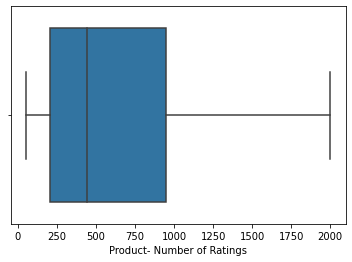

In [ ]:
# After
sb.boxplot(x=df_bag['Product- Number of Ratings'], showfliers = False)
plt.show()

***Product- Number of Favourites***

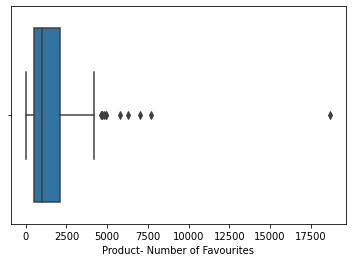

In [ ]:
# Before
sb.boxplot(x=df_bag['Product- Number of Favourites'])
plt.show()

In [ ]:
upperOutlierIdx , lowerOutlierIdx = outlierDetector(df_bag['Product- Number of Favourites'])

if(len(upperOutlierIdx) > 0):
  df_bag.drop(upperOutlierIdx, axis=0, inplace=True)

if(len(lowerOutlierIdx)> 0):
    df_bag.drop(lowerOutlierIdx, axis=0, inplace=True)

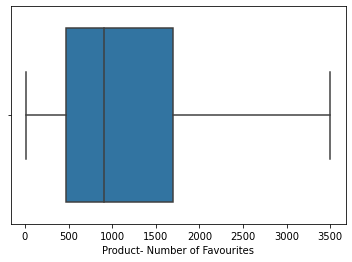

In [ ]:
# After
sb.boxplot(x=df_bag['Product- Number of Favourites'], showfliers = False)
plt.show()

# Data Visualization

This graph shows that the Product- Number of Quantity Sold against Product- Price (RM). From this graph, we can conclude that the number of quantity sold by product is not indirectly affected by the price of the product. Overall, the product with low price tends to have high number of quantity sold.

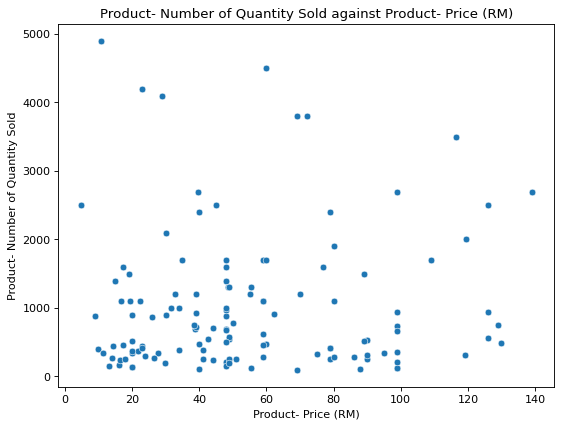

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sb.scatterplot(x=df_bag['Product- Price (RM)'], y=df_bag['Product- Number of Quantity Sold'])
plt.title('Product- Number of Quantity Sold against Product- Price (RM)')
plt.xlabel('Product- Price (RM)')
plt.ylabel('Product- Number of Quantity Sold')
plt.show()

This graph shows that the Product- Number of Quantity Sold against Product- Number of Ratings. Based on this graph, these two variables seems to have a linear relationship between each other as higher number of ratings by the product, higher the number of quantity sold by the product.

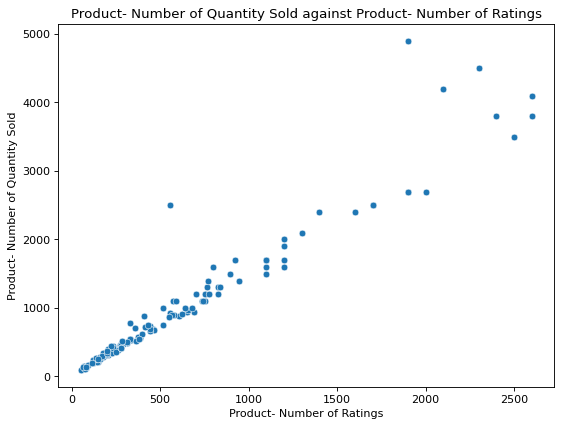

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sb.scatterplot(x=df_bag['Product- Number of Ratings'], y=df_bag['Product- Number of Quantity Sold'])
plt.title('Product- Number of Quantity Sold against Product- Number of Ratings')
plt.xlabel('Product- Number of Ratings')
plt.ylabel('Product- Number of Quantity Sold')
plt.show()

This graph shows that the Product- Number of Quantity Sold against Product- Star Rating. Based on this graph, we can conclude that product with higher star rating tends to have higher number of quantity sold by product compared to lower star rating.

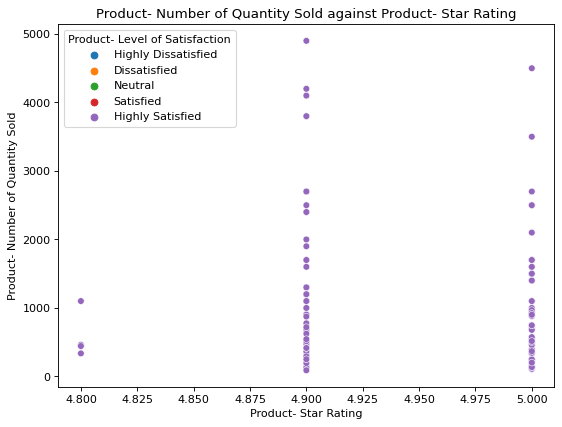

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sb.scatterplot(x=df_bag['Product- Star Rating'], y=df_bag['Product- Number of Quantity Sold'],hue=df_bag['Product- Level of Satisfaction'])
plt.title('Product- Number of Quantity Sold against Product- Star Rating')
plt.xlabel('Product- Star Rating')
plt.ylabel('Product- Number of Quantity Sold')
plt.show()

This graph shows that the Product- Number of Quantity Sold against Product- Number of Favourites. 

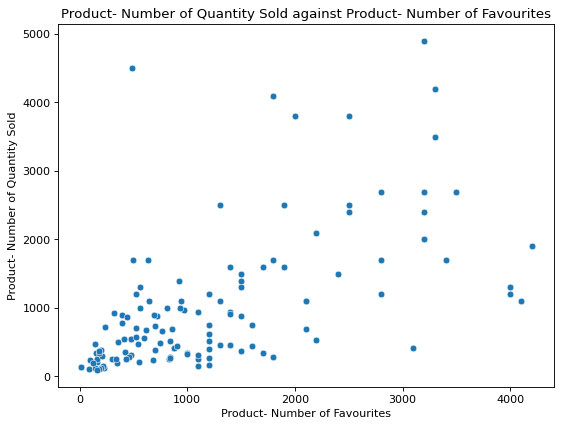

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sb.scatterplot(x=df_bag['Product- Number of Favourites'], y=df_bag['Product- Number of Quantity Sold'])
plt.title('Product- Number of Quantity Sold against Product- Number of Favourites')
plt.xlabel('Product- Number of Favourites')
plt.ylabel('Product- Number of Quantity Sold')
plt.show()

# Load

In [ ]:
df_bag.to_csv('ETL_Shopee_Woman_Bag.csv', index=False)